# Dilemme du Prisonnier

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Definition model
#Etat 0 = Non coopération
#Etat 1 = Coopération

#Hyper Paramètres
alpha = 0.618
gamma = 0.95
#gamma = 0 #On tend vers l'équilibre de Nash
#gamma = 1 #On tend vers l'équilibre de Pareto

#a = Gain de l'equilibre de Nash - Aucun coopération
#b = Gain de l'équilibre de Pareto - Coopération
#c = Gain traitre
#d = Gain victime trahison
#a, b, c, d = 1, 3, 5, 0
a, b, c, d = -10, 10, 30, -30
rewards = np.array([[a, a], [c, d], [d, c], [b, b]])
#co_state = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])


In [ ]:
def DilemmePrisonnier(episodes = 10, iter_per_ep = 1000, epsilon = 1, alpha = 0.618, gamma = 0.95, reward = rewards):

    rewardTracker = []
    stateTracker = []
    gainTracker = []

    #Matrice d'Etat modélisant la chaine de Markov de A et B
    Q_A, Q_B = np.zeros((2, 2)), np.zeros((2, 2))

    #print("Start Game Theory Algo - IA for fun : Dilemme du Prisonnier")
    for i in range(1, episodes + 1):

        #if(i%10 == 0):
        #    print("Start episode : " + str(i))

        G_A, G_B = 0, 0
        state_A, state_B = np.random.randint(2, size=1)[0],  np.random.randint(2, size=1)[0]

        for j in range(iter_per_ep):

            #action_A, action_B = 0, 0
            #state_A, state_B = 1, 1

            if np.random.rand() > epsilon:
                action_A, action_B = np.argmax(Q_A[state_A]), np.argmax(Q_A[state_B])

            else:
                action_A, action_B = np.random.randint(2, size=1)[0], np.random.randint(2, size=1)[0]
                epsilon -= 10**(-3)

            reward = rewards[2 * action_A + action_B]
            next_state_A, next_state_B = action_A, action_B
            Q_A[state_A, action_A] += alpha * (reward[0] + gamma * np.max(Q_A[next_state_A]) - Q_A[state_A, action_A])
            Q_B[state_B, action_B] += alpha * (reward[1] + gamma * np.max(Q_B[next_state_B]) - Q_B[state_B, action_B])

            G_A, G_B = G_A + reward[0], G_B + reward[1]
            state_A, state_B = next_state_A, next_state_B

            stateTracker.append([state_A, state_B])

            if j % 100 == 0:
                rewardTracker.append([reward[0], reward[1]])


    gainTracker.append([G_A, G_B])
    #print("Fin Algo - Modèle chargé")

    return Q_A, Q_B, rewardTracker, stateTracker

Start Game Theory Algo - IA for fun : Dilemme du Prisonnier
Nombre d'iteration effectuée : 10000
Le gain moyen parmi les episodes finaux est de 20.0
Soit un état final de [[10, 10], [10, 10], [10, 10], [10, 10], [10, 10], [10, 10], [10, 10], [10, 10], [10, 10], [10, 10]]
Le gain moyen général lui vaut 15.2


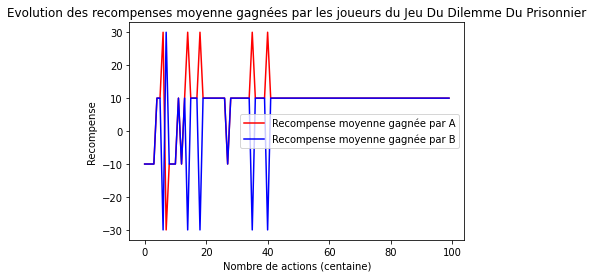

In [ ]:
print("Start Game Theory Algo - IA for fun : Dilemme du Prisonnier")
Q_A, Q_B, rewardTracker, stateTracker = DilemmePrisonnier()

print("Nombre d'iteration effectuée : {}".format(len(stateTracker)))

#Affichage Reward Tracker
average_end = np.sum(rewardTracker[-10:]) / 10.0
print("Le gain moyen parmi les episodes finaux est de {}" .format(average_end))
print("Soit un état final de {}".format(rewardTracker[-10:]))

average_gain = np.sum(rewardTracker) / len(rewardTracker)
print("Le gain moyen général lui vaut {}".format(average_gain))

#rewardTracker = softmax(rewardTracker)
YA, YB = [], []
for i in range(len(rewardTracker)):
    YA.append(rewardTracker[i][0])
    YB.append(rewardTracker[i][1])

plt.plot(YA, c='r', label='Recompense moyenne gagnée par A')
plt.plot(YB, c='b', label='Recompense moyenne gagnée par B')

plt.legend(loc='best')
plt.title("Evolution des recompenses moyenne gagnées par les joueurs du Jeu Du Dilemme Du Prisonnier")
plt.xlabel("Nombre de actions (centaine)")
plt.ylabel("Recompense")

plt.show()

In [ ]:
#Affichage Action Matrix and State chosen over time

#Softmax(Q) représente la probabilité d'action
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    # Soustrayez le max pour des raisons de stabilité numérique
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / e_x.sum(axis=1, keepdims=True)

# Exemple d'utilisation
#x = np.array([[1, 2, 3, 6],
#              [2, 4, 5, 6],
#              [3, 8, 7, 6]])
#print(softmax(x))

print("Q_A : {}\n Q_B : {}".format(softmax(Q_A), softmax(Q_B)))
print("Voici les 100 premiers états de A et B")
print(stateTracker[0:100])
print("Voici les 100 derniers états de A et B")
print(stateTracker[-100:])

Q_A : [[5.16250215e-27 1.00000000e+00]
 [1.76900627e-11 1.00000000e+00]]
 Q_B : [[1.30610450e-26 1.00000000e+00]
 [5.32301893e-01 4.67698107e-01]]
Voici les 100 premiers états de A et B
[[0, 0], [1, 0], [1, 0], [0, 1], [0, 0], [0, 0], [1, 1], [0, 1], [1, 1], [0, 1], [1, 1], [0, 1], [1, 1], [0, 0], [0, 1], [1, 0], [1, 1], [0, 1], [0, 1], [1, 1], [0, 1], [1, 1], [0, 0], [0, 1], [0, 0], [1, 0], [1, 1], [0, 1], [1, 1], [1, 1], [1, 1], [1, 1], [0, 0], [0, 0], [0, 1], [0, 1], [1, 0], [1, 0], [0, 0], [1, 0], [1, 1], [0, 0], [1, 1], [1, 1], [0, 0], [0, 1], [0, 0], [1, 0], [0, 0], [1, 0], [0, 0], [0, 0], [0, 1], [1, 0], [1, 0], [0, 0], [0, 0], [1, 0], [1, 0], [1, 0], [0, 0], [0, 0], [1, 0], [1, 0], [1, 0], [0, 1], [0, 0], [0, 0], [0, 0], [1, 1], [1, 1], [0, 1], [1, 1], [0, 1], [1, 0], [0, 1], [1, 0], [1, 0], [1, 0], [1, 1], [0, 0], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [1, 1], [0, 1], [1, 0], [1, 0], [0, 1], [1, 1], [0, 1], [0, 1], [1, 0], [0, 1], [0, 0], [1, 1], [0, 1]]
Voici les 100

## Etude des Hyper Paramètres

In [ ]:
def get_best_gamma_parameter(iter = 100) :
    #indexes_start = []
    strategies = []
    gammas = []
    for i in range(iter):
        gamma = i/iter
        Q_A, Q_B, rewardTracker, stateTracker = DilemmePrisonnier(gamma = gamma)

        #index_start_strategy, strategy = get_index_start_strategy(rewardTracker)
        #indexes_start.append(index_start_strategy)
        strategy = rewardTracker[-1]
        gammas.append(gamma)
        if (strategy[0] == 10 and strategy[1] == 10):
            strategies.append(1)
        else:
            strategies.append(0)

    return gammas, strategies

In [ ]:
print("Start Game Theory Algo - IA for fun : Dilemme du Prisonnier")

gammas, strategies = get_best_gamma_parameter()

Start Game Theory Algo - IA for fun : Dilemme du Prisonnier


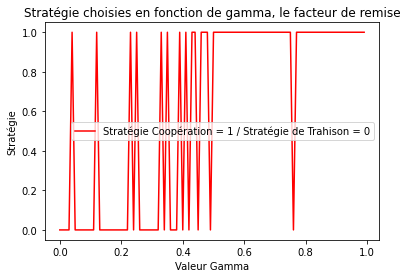

In [ ]:
#Affichage de la stratégie choisie en fonction de gamma
plt.plot(gammas, strategies, c='r', label='Stratégie Coopération = 1 / Stratégie de Trahison = 0')

plt.legend(loc='best')
plt.title("Stratégie choisies en fonction de gamma, le facteur de remise")
plt.ylabel("Stratégie")
plt.xlabel("Valeur Gamma")
plt.show()

In [ ]:
def get_index_start_strategy(rewardTracker):
    #rewardTracker.reverse()
    reverseRewardTracker = rewardTracker[::-1]

    max_index = len(rewardTracker)
    index = 0
    isSameValue = True
    while isSameValue and index < max_index:
        isSameValue = (reverseRewardTracker[index] == reverseRewardTracker[index + 1])
        index += 1

    return index, reverseRewardTracker[0]

In [ ]:
print("L'indice de début de stratégie est de " + str(get_index_start_strategy(rewardTracker)))

L'indice de début de stratégie est de (59, [10, 10])


In [ ]:
def get_best_alpha_parameter(iter = 100):

    alphas = []
    indexes_start_strategy = []
    strategies = []

    for i in range(iter):
        alpha = i/iter

        Q_A, Q_B, rewardTracker, stateTracker = DilemmePrisonnier(alpha = alpha)

        index_start_strategy, strategy = get_index_start_strategy(rewardTracker)
        indexes_start_strategy.append(index_start_strategy)
        alphas.append(alpha)

        if (strategy[0] == 10 and strategy[1] == 10):
            strategies.append(1)
        else:
            strategies.append(0)

    return alphas, strategies, indexes_start_strategy

In [ ]:
print("Start Game Theory Algo - IA for fun : Dilemme du Prisonnier")

alphas, strategies, indexes_start_strategy = get_best_alpha_parameter()
print("End Algo")

Start Game Theory Algo - IA for fun : Dilemme du Prisonnier
End Algo


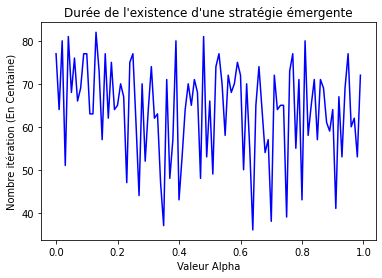

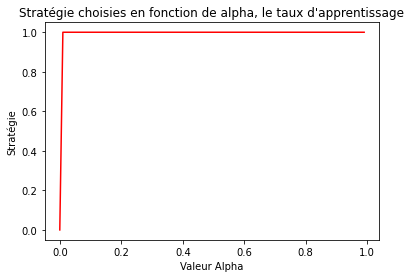

In [ ]:
#Affichage de la durée d'existence de stratégie émergence selon alpha
#+ Affichage strategies choisies selon alpha

plt.plot(alphas, indexes_start_strategy, c='b')
plt.title("Durée de l'existence d'une stratégie émergente")
plt.ylabel("Nombre itération (En Centaine)")
plt.xlabel("Valeur Alpha")
plt.show()

plt.plot(alphas, strategies, c='r', label='Stratégie Coopération = 1 / Stratégie de Trahison = 0')
plt.title("Stratégie choisies en fonction de alpha, le taux d'apprentissage")
plt.ylabel("Stratégie")
plt.xlabel("Valeur Alpha")
plt.show()

In [ ]:
#Conclusion analyse hyper paramètre

